# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
#data_dir = './data'

#FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)


Extracting mnist:   0%|          | 0.00/60.0K [00:00<?, ?File/s]
Extracting mnist:   1%|          | 552/60.0K [00:00<00:10, 5.51KFile/s]
Extracting mnist:   2%|▏         | 1.09K/60.0K [00:00<00:10, 5.47KFile/s]
Extracting mnist:   3%|▎         | 1.64K/60.0K [00:00<00:10, 5.47KFile/s]
Extracting mnist:   4%|▎         | 2.19K/60.0K [00:00<00:10, 5.47KFile/s]
Extracting mnist:   5%|▍         | 2.73K/60.0K [00:00<00:10, 5.45KFile/s]
Extracting mnist:   5%|▌         | 3.27K/60.0K [00:00<00:10, 5.45KFile/s]
Extracting mnist:   6%|▋         | 3.81K/60.0K [00:00<00:10, 5.43KFile/s]
Extracting mnist:   7%|▋         | 4.36K/60.0K [00:00<00:10, 5.41KFile/s]
Extracting mnist:   8%|▊         | 4.89K/60.0K [00:00<00:10, 5.40KFile/s]
Extracting mnist:   9%|▉         | 5.42K/60.0K [00:01<00:10, 5.34KFile/s]
Extracting mnist:  10%|▉         | 5.96K/60.0K [00:01<00:10, 5.35KFile/s]
Extracting mnist:  11%|█         | 6.50K/60.0K [00:01<00:09, 5.36KFile/s]
Extracting mnist:  12%|█▏        | 7.02K/60.0K [

Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

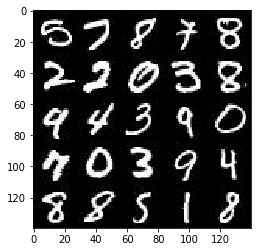

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

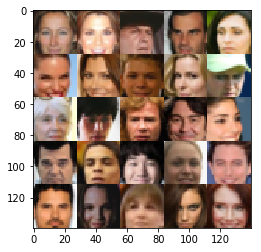

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    in_learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    return input_real, input_z, in_learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/usr/local/lib/python3.5/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/usr/local/lib/python3.5/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/usr/local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/usr/local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'F

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [18]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        x1 = tf.layers.conv2d(images, 64,5, strides=2, padding='same')
        relul = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relul, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3,(-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [25]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
        # Layer 1 in: 7x7x256
        layer_1 = tf.layers.dense(z, 4 * 4 * 512)
        layer_1 = tf.reshape(layer_1, (-1, 4, 4, 512))
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
        # Layer 1 out: 4x4x512
        
        layer_2 = tf.layers.conv2d_transpose(layer_1, 128, 4, 1, padding='valid', kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        # Layer 2 out: 8x8x128
        
        layer_3 = tf.layers.conv2d_transpose(layer_2, 64, 5, 2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
        # Layer 3 out: 16x16x64
        
        layer_4 = tf.layers.conv2d_transpose(layer_3, 32, 5, 2, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        layer_4 = tf.layers.batch_normalization(layer_4, training=is_train)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
        # Layer 4 out: 32x32x32
        
        logits = tf.layers.conv2d_transpose(layer_4, out_channel_dim, 3, 1, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.1))
        output = tf.tanh(logits)
        
        return output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [26]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z, out_channel_dim)
    dis_model_real, dis_logits_real = discriminator(input_real)
    dis_model_fake, dis_logits_fake = discriminator(gen_model, reuse=True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, labels=tf.ones_like(dis_logits_real) * 0.9))
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.zeros_like(dis_logits_fake)))
    dis_loss = dis_loss_real + dis_loss_fake
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.ones_like(dis_logits_fake)))
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [29]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    dis_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        dis_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        gen_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
    return dis_train_ops, gen_train_ops

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [30]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [35]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, in_learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    dis_ops, gen_ops = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(dis_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                _ = sess.run(gen_ops, feed_dict={ input_z: batch_z, in_learning_rate: learning_rate })
                
                if steps % print_every == 0:
                    dis_loss_train = dis_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    gen_loss_train = gen_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(dis_loss_train),
                         "Generator Loss: {:.4f}".format(gen_loss_train))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.1922... Generator Loss: 0.6746
Epoch 1/2... Discriminator Loss: 1.7629... Generator Loss: 0.5006
Epoch 1/2... Discriminator Loss: 2.2273... Generator Loss: 0.3967
Epoch 1/2... Discriminator Loss: 1.6760... Generator Loss: 0.5302
Epoch 1/2... Discriminator Loss: 1.0977... Generator Loss: 1.2280
Epoch 1/2... Discriminator Loss: 1.6046... Generator Loss: 0.5220
Epoch 1/2... Discriminator Loss: 1.4713... Generator Loss: 0.5604
Epoch 1/2... Discriminator Loss: 2.1054... Generator Loss: 0.2389
Epoch 1/2... Discriminator Loss: 1.8666... Generator Loss: 0.3250
Epoch 1/2... Discriminator Loss: 1.9389... Generator Loss: 0.2817


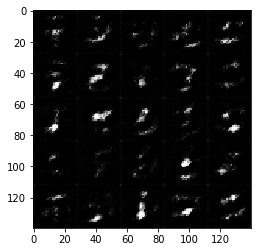

Epoch 1/2... Discriminator Loss: 0.8780... Generator Loss: 1.1713
Epoch 1/2... Discriminator Loss: 1.0264... Generator Loss: 1.5398
Epoch 1/2... Discriminator Loss: 1.2663... Generator Loss: 2.2655
Epoch 1/2... Discriminator Loss: 0.9756... Generator Loss: 1.6191
Epoch 1/2... Discriminator Loss: 1.3748... Generator Loss: 0.6284
Epoch 1/2... Discriminator Loss: 1.0449... Generator Loss: 1.3052
Epoch 1/2... Discriminator Loss: 1.2357... Generator Loss: 0.6598
Epoch 1/2... Discriminator Loss: 1.2375... Generator Loss: 1.2507
Epoch 1/2... Discriminator Loss: 1.1207... Generator Loss: 0.8957
Epoch 1/2... Discriminator Loss: 1.2276... Generator Loss: 2.1999


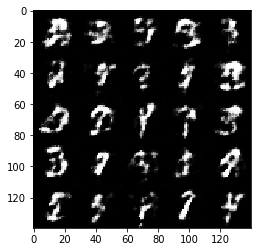

Epoch 1/2... Discriminator Loss: 0.9588... Generator Loss: 1.3193
Epoch 1/2... Discriminator Loss: 1.1177... Generator Loss: 1.2777
Epoch 1/2... Discriminator Loss: 1.1728... Generator Loss: 0.7261
Epoch 1/2... Discriminator Loss: 1.3804... Generator Loss: 0.5141
Epoch 1/2... Discriminator Loss: 0.9707... Generator Loss: 2.2901
Epoch 1/2... Discriminator Loss: 1.3116... Generator Loss: 0.8154
Epoch 1/2... Discriminator Loss: 1.0355... Generator Loss: 1.3909
Epoch 1/2... Discriminator Loss: 0.9659... Generator Loss: 1.6839
Epoch 1/2... Discriminator Loss: 0.9680... Generator Loss: 1.4637
Epoch 1/2... Discriminator Loss: 0.9978... Generator Loss: 0.9987


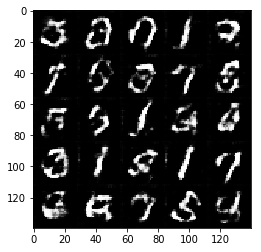

Epoch 1/2... Discriminator Loss: 1.4822... Generator Loss: 0.4769
Epoch 1/2... Discriminator Loss: 1.1271... Generator Loss: 0.8639
Epoch 1/2... Discriminator Loss: 0.9907... Generator Loss: 1.4655
Epoch 1/2... Discriminator Loss: 1.5617... Generator Loss: 1.9769
Epoch 1/2... Discriminator Loss: 1.0729... Generator Loss: 1.2708
Epoch 1/2... Discriminator Loss: 1.3934... Generator Loss: 2.6892
Epoch 1/2... Discriminator Loss: 0.9982... Generator Loss: 1.1341
Epoch 1/2... Discriminator Loss: 1.3927... Generator Loss: 0.7513
Epoch 1/2... Discriminator Loss: 1.2105... Generator Loss: 0.9120
Epoch 1/2... Discriminator Loss: 1.3610... Generator Loss: 0.5970


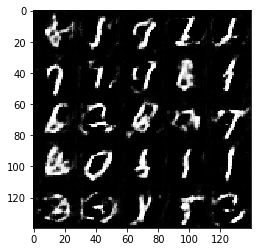

Epoch 1/2... Discriminator Loss: 0.8958... Generator Loss: 1.3930
Epoch 1/2... Discriminator Loss: 1.5645... Generator Loss: 0.4388
Epoch 1/2... Discriminator Loss: 1.0950... Generator Loss: 0.8082
Epoch 1/2... Discriminator Loss: 0.9331... Generator Loss: 1.1737
Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 1.3462
Epoch 1/2... Discriminator Loss: 1.0652... Generator Loss: 1.2169
Epoch 1/2... Discriminator Loss: 1.1841... Generator Loss: 0.7144
Epoch 1/2... Discriminator Loss: 1.0089... Generator Loss: 1.0752
Epoch 1/2... Discriminator Loss: 0.9804... Generator Loss: 1.2459
Epoch 1/2... Discriminator Loss: 1.1645... Generator Loss: 0.8276


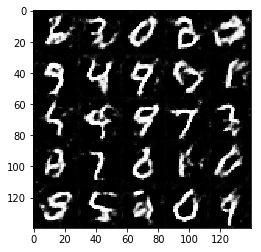

Epoch 1/2... Discriminator Loss: 1.0718... Generator Loss: 0.8306
Epoch 1/2... Discriminator Loss: 1.3914... Generator Loss: 0.5937
Epoch 1/2... Discriminator Loss: 1.2903... Generator Loss: 0.6017
Epoch 1/2... Discriminator Loss: 0.9374... Generator Loss: 1.4572
Epoch 1/2... Discriminator Loss: 1.0857... Generator Loss: 0.9385
Epoch 1/2... Discriminator Loss: 0.9187... Generator Loss: 1.1704
Epoch 1/2... Discriminator Loss: 0.9397... Generator Loss: 1.6523
Epoch 1/2... Discriminator Loss: 1.0359... Generator Loss: 1.1594
Epoch 1/2... Discriminator Loss: 1.2683... Generator Loss: 0.6066
Epoch 1/2... Discriminator Loss: 1.2254... Generator Loss: 0.6434


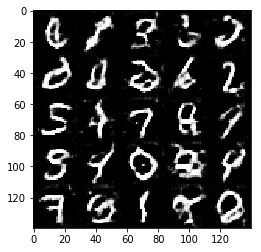

Epoch 1/2... Discriminator Loss: 1.0629... Generator Loss: 0.9105
Epoch 1/2... Discriminator Loss: 1.8110... Generator Loss: 0.3556
Epoch 1/2... Discriminator Loss: 1.3021... Generator Loss: 0.6417
Epoch 1/2... Discriminator Loss: 1.2175... Generator Loss: 0.7047
Epoch 1/2... Discriminator Loss: 1.3553... Generator Loss: 0.5893
Epoch 1/2... Discriminator Loss: 1.1092... Generator Loss: 0.7841
Epoch 1/2... Discriminator Loss: 1.1853... Generator Loss: 0.6707
Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 1.2629
Epoch 1/2... Discriminator Loss: 0.9123... Generator Loss: 1.5627
Epoch 1/2... Discriminator Loss: 1.1204... Generator Loss: 0.9857


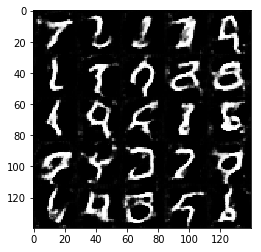

Epoch 1/2... Discriminator Loss: 0.9689... Generator Loss: 1.1371
Epoch 1/2... Discriminator Loss: 1.0258... Generator Loss: 0.8922
Epoch 1/2... Discriminator Loss: 0.9669... Generator Loss: 0.9648
Epoch 1/2... Discriminator Loss: 0.9412... Generator Loss: 1.5278
Epoch 1/2... Discriminator Loss: 1.1867... Generator Loss: 0.7372
Epoch 1/2... Discriminator Loss: 0.9908... Generator Loss: 1.0969
Epoch 1/2... Discriminator Loss: 0.8076... Generator Loss: 1.2821
Epoch 1/2... Discriminator Loss: 0.9917... Generator Loss: 1.0167
Epoch 1/2... Discriminator Loss: 1.0571... Generator Loss: 1.5717
Epoch 1/2... Discriminator Loss: 1.2633... Generator Loss: 0.6067


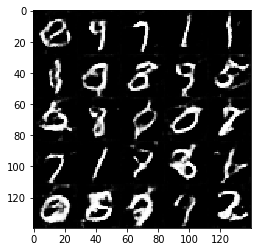

Epoch 1/2... Discriminator Loss: 1.2536... Generator Loss: 0.6252
Epoch 1/2... Discriminator Loss: 1.4138... Generator Loss: 0.5459
Epoch 1/2... Discriminator Loss: 1.0330... Generator Loss: 1.1657
Epoch 1/2... Discriminator Loss: 1.2400... Generator Loss: 0.7669
Epoch 1/2... Discriminator Loss: 0.9551... Generator Loss: 1.0375
Epoch 1/2... Discriminator Loss: 1.3186... Generator Loss: 0.5964
Epoch 1/2... Discriminator Loss: 0.9709... Generator Loss: 1.0712
Epoch 1/2... Discriminator Loss: 1.0179... Generator Loss: 1.2874
Epoch 1/2... Discriminator Loss: 1.1384... Generator Loss: 0.8923
Epoch 1/2... Discriminator Loss: 1.1153... Generator Loss: 0.8490


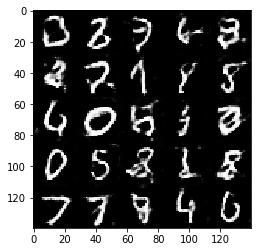

Epoch 1/2... Discriminator Loss: 0.7587... Generator Loss: 1.4023
Epoch 1/2... Discriminator Loss: 1.3660... Generator Loss: 0.5336
Epoch 1/2... Discriminator Loss: 1.1431... Generator Loss: 0.6867
Epoch 2/2... Discriminator Loss: 1.3347... Generator Loss: 2.7219
Epoch 2/2... Discriminator Loss: 1.2718... Generator Loss: 0.7264
Epoch 2/2... Discriminator Loss: 1.1214... Generator Loss: 0.8087
Epoch 2/2... Discriminator Loss: 0.9638... Generator Loss: 1.1868
Epoch 2/2... Discriminator Loss: 1.2953... Generator Loss: 0.6922
Epoch 2/2... Discriminator Loss: 0.9466... Generator Loss: 1.4259
Epoch 2/2... Discriminator Loss: 1.0346... Generator Loss: 1.0668


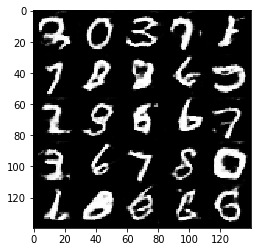

Epoch 2/2... Discriminator Loss: 1.2697... Generator Loss: 0.6301
Epoch 2/2... Discriminator Loss: 1.1876... Generator Loss: 0.6773
Epoch 2/2... Discriminator Loss: 1.6434... Generator Loss: 0.4429
Epoch 2/2... Discriminator Loss: 1.1193... Generator Loss: 0.8114
Epoch 2/2... Discriminator Loss: 0.9196... Generator Loss: 1.6715
Epoch 2/2... Discriminator Loss: 0.9453... Generator Loss: 1.0453
Epoch 2/2... Discriminator Loss: 1.0990... Generator Loss: 0.8155
Epoch 2/2... Discriminator Loss: 1.2821... Generator Loss: 0.6331
Epoch 2/2... Discriminator Loss: 1.2504... Generator Loss: 0.7627
Epoch 2/2... Discriminator Loss: 0.9948... Generator Loss: 1.0564


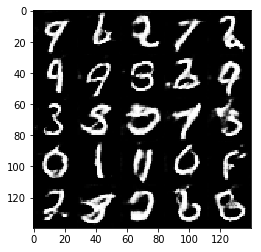

Epoch 2/2... Discriminator Loss: 1.0049... Generator Loss: 1.1898
Epoch 2/2... Discriminator Loss: 0.9855... Generator Loss: 1.0619
Epoch 2/2... Discriminator Loss: 1.0728... Generator Loss: 0.8415
Epoch 2/2... Discriminator Loss: 0.9288... Generator Loss: 1.4386
Epoch 2/2... Discriminator Loss: 1.4653... Generator Loss: 0.5282
Epoch 2/2... Discriminator Loss: 0.9776... Generator Loss: 1.1354
Epoch 2/2... Discriminator Loss: 1.0607... Generator Loss: 0.8555
Epoch 2/2... Discriminator Loss: 1.1290... Generator Loss: 0.7451
Epoch 2/2... Discriminator Loss: 1.1090... Generator Loss: 0.7889
Epoch 2/2... Discriminator Loss: 1.1001... Generator Loss: 1.2686


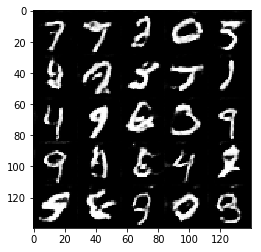

Epoch 2/2... Discriminator Loss: 1.4107... Generator Loss: 0.5449
Epoch 2/2... Discriminator Loss: 0.9508... Generator Loss: 1.7418
Epoch 2/2... Discriminator Loss: 0.9351... Generator Loss: 1.6622
Epoch 2/2... Discriminator Loss: 1.1322... Generator Loss: 0.8204
Epoch 2/2... Discriminator Loss: 1.0204... Generator Loss: 1.1856
Epoch 2/2... Discriminator Loss: 1.0568... Generator Loss: 0.9896
Epoch 2/2... Discriminator Loss: 0.9685... Generator Loss: 1.2318
Epoch 2/2... Discriminator Loss: 1.0963... Generator Loss: 1.8377
Epoch 2/2... Discriminator Loss: 1.1165... Generator Loss: 2.0989
Epoch 2/2... Discriminator Loss: 1.0233... Generator Loss: 0.9320


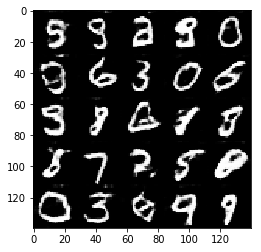

Epoch 2/2... Discriminator Loss: 0.9611... Generator Loss: 1.1101
Epoch 2/2... Discriminator Loss: 1.2046... Generator Loss: 0.8135
Epoch 2/2... Discriminator Loss: 0.9107... Generator Loss: 1.6297
Epoch 2/2... Discriminator Loss: 0.9690... Generator Loss: 1.2386
Epoch 2/2... Discriminator Loss: 1.3185... Generator Loss: 0.6343
Epoch 2/2... Discriminator Loss: 0.9318... Generator Loss: 1.3380
Epoch 2/2... Discriminator Loss: 1.6822... Generator Loss: 0.4034
Epoch 2/2... Discriminator Loss: 0.9571... Generator Loss: 1.1379
Epoch 2/2... Discriminator Loss: 1.7259... Generator Loss: 3.1013
Epoch 2/2... Discriminator Loss: 1.3434... Generator Loss: 0.7271


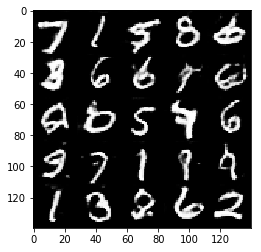

Epoch 2/2... Discriminator Loss: 1.2015... Generator Loss: 0.6923
Epoch 2/2... Discriminator Loss: 1.0748... Generator Loss: 1.0761
Epoch 2/2... Discriminator Loss: 0.9122... Generator Loss: 0.9944
Epoch 2/2... Discriminator Loss: 1.0180... Generator Loss: 1.2102
Epoch 2/2... Discriminator Loss: 0.8917... Generator Loss: 1.1229
Epoch 2/2... Discriminator Loss: 0.9033... Generator Loss: 1.6744
Epoch 2/2... Discriminator Loss: 1.4652... Generator Loss: 2.8115
Epoch 2/2... Discriminator Loss: 1.6228... Generator Loss: 0.4209
Epoch 2/2... Discriminator Loss: 1.0105... Generator Loss: 0.9968
Epoch 2/2... Discriminator Loss: 1.0143... Generator Loss: 1.0406


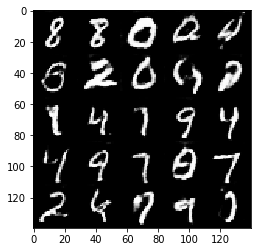

Epoch 2/2... Discriminator Loss: 1.8334... Generator Loss: 0.3647
Epoch 2/2... Discriminator Loss: 1.0476... Generator Loss: 2.5500
Epoch 2/2... Discriminator Loss: 1.2257... Generator Loss: 0.7120
Epoch 2/2... Discriminator Loss: 1.0230... Generator Loss: 1.0414
Epoch 2/2... Discriminator Loss: 1.1257... Generator Loss: 0.7416
Epoch 2/2... Discriminator Loss: 0.8626... Generator Loss: 1.3231
Epoch 2/2... Discriminator Loss: 1.3855... Generator Loss: 0.5763
Epoch 2/2... Discriminator Loss: 1.1551... Generator Loss: 0.7722
Epoch 2/2... Discriminator Loss: 0.7824... Generator Loss: 1.8699
Epoch 2/2... Discriminator Loss: 1.6970... Generator Loss: 0.4037


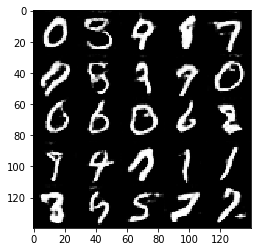

Epoch 2/2... Discriminator Loss: 0.9988... Generator Loss: 1.9933
Epoch 2/2... Discriminator Loss: 1.1556... Generator Loss: 0.7743
Epoch 2/2... Discriminator Loss: 0.9252... Generator Loss: 1.0455
Epoch 2/2... Discriminator Loss: 1.1561... Generator Loss: 0.8633
Epoch 2/2... Discriminator Loss: 1.4142... Generator Loss: 2.8259
Epoch 2/2... Discriminator Loss: 1.4527... Generator Loss: 0.4867
Epoch 2/2... Discriminator Loss: 1.1145... Generator Loss: 0.8895
Epoch 2/2... Discriminator Loss: 0.9347... Generator Loss: 1.5438
Epoch 2/2... Discriminator Loss: 0.9908... Generator Loss: 1.6654
Epoch 2/2... Discriminator Loss: 0.8808... Generator Loss: 1.2776


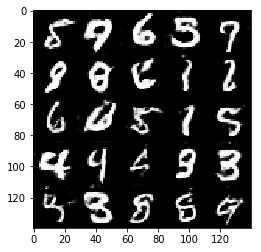

Epoch 2/2... Discriminator Loss: 0.7654... Generator Loss: 1.5372
Epoch 2/2... Discriminator Loss: 0.9848... Generator Loss: 1.1747
Epoch 2/2... Discriminator Loss: 0.9753... Generator Loss: 2.0251
Epoch 2/2... Discriminator Loss: 1.1178... Generator Loss: 0.7772
Epoch 2/2... Discriminator Loss: 1.1328... Generator Loss: 2.4497
Epoch 2/2... Discriminator Loss: 1.0032... Generator Loss: 1.0249
Epoch 2/2... Discriminator Loss: 1.0460... Generator Loss: 2.1801
Epoch 2/2... Discriminator Loss: 0.9809... Generator Loss: 2.5213
Epoch 2/2... Discriminator Loss: 0.7916... Generator Loss: 1.2890
Epoch 2/2... Discriminator Loss: 0.9321... Generator Loss: 1.0409


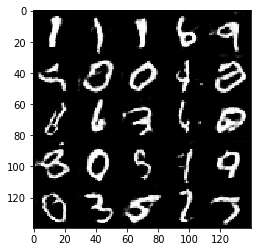

Epoch 2/2... Discriminator Loss: 0.7645... Generator Loss: 1.4203
Epoch 2/2... Discriminator Loss: 1.4922... Generator Loss: 0.5479
Epoch 2/2... Discriminator Loss: 0.8589... Generator Loss: 1.4823
Epoch 2/2... Discriminator Loss: 1.0626... Generator Loss: 0.9593
Epoch 2/2... Discriminator Loss: 0.9112... Generator Loss: 1.0666
Epoch 2/2... Discriminator Loss: 1.3411... Generator Loss: 0.6228
Epoch 2/2... Discriminator Loss: 0.7946... Generator Loss: 1.2852


In [36]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4164... Generator Loss: 3.0832
Epoch 1/1... Discriminator Loss: 0.4110... Generator Loss: 3.1423
Epoch 1/1... Discriminator Loss: 0.4096... Generator Loss: 3.1546
Epoch 1/1... Discriminator Loss: 0.3985... Generator Loss: 4.8465
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 3.5175
Epoch 1/1... Discriminator Loss: 0.3645... Generator Loss: 4.0734
Epoch 1/1... Discriminator Loss: 0.3952... Generator Loss: 3.5362
Epoch 1/1... Discriminator Loss: 0.3617... Generator Loss: 4.2822
Epoch 1/1... Discriminator Loss: 0.3651... Generator Loss: 3.9269
Epoch 1/1... Discriminator Loss: 0.5926... Generator Loss: 2.1009


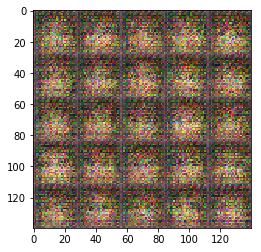

Epoch 1/1... Discriminator Loss: 0.3596... Generator Loss: 4.2067
Epoch 1/1... Discriminator Loss: 0.3636... Generator Loss: 5.0900
Epoch 1/1... Discriminator Loss: 0.3842... Generator Loss: 3.6304
Epoch 1/1... Discriminator Loss: 0.3650... Generator Loss: 4.8703
Epoch 1/1... Discriminator Loss: 0.5022... Generator Loss: 2.5083
Epoch 1/1... Discriminator Loss: 0.3694... Generator Loss: 4.1524
Epoch 1/1... Discriminator Loss: 0.3647... Generator Loss: 4.3814
Epoch 1/1... Discriminator Loss: 0.3662... Generator Loss: 4.1213
Epoch 1/1... Discriminator Loss: 0.3979... Generator Loss: 4.8272
Epoch 1/1... Discriminator Loss: 0.3789... Generator Loss: 5.8033


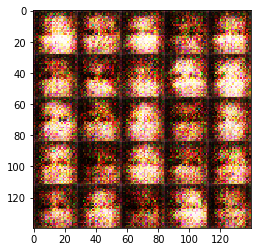

Epoch 1/1... Discriminator Loss: 0.5439... Generator Loss: 2.2101
Epoch 1/1... Discriminator Loss: 0.4248... Generator Loss: 4.0424
Epoch 1/1... Discriminator Loss: 0.4298... Generator Loss: 3.1340
Epoch 1/1... Discriminator Loss: 0.3896... Generator Loss: 3.6536
Epoch 1/1... Discriminator Loss: 0.3834... Generator Loss: 3.8083
Epoch 1/1... Discriminator Loss: 0.3906... Generator Loss: 4.5302
Epoch 1/1... Discriminator Loss: 0.3557... Generator Loss: 4.3358
Epoch 1/1... Discriminator Loss: 0.3746... Generator Loss: 3.9770
Epoch 1/1... Discriminator Loss: 0.3935... Generator Loss: 3.3469
Epoch 1/1... Discriminator Loss: 0.3645... Generator Loss: 4.5297


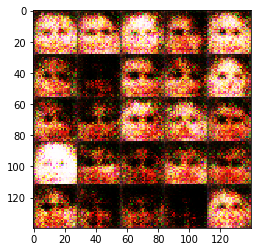

Epoch 1/1... Discriminator Loss: 0.3593... Generator Loss: 4.3953
Epoch 1/1... Discriminator Loss: 0.3689... Generator Loss: 4.6035
Epoch 1/1... Discriminator Loss: 0.3997... Generator Loss: 3.6183
Epoch 1/1... Discriminator Loss: 0.3632... Generator Loss: 3.9313
Epoch 1/1... Discriminator Loss: 0.3529... Generator Loss: 4.8719
Epoch 1/1... Discriminator Loss: 0.3518... Generator Loss: 4.8176
Epoch 1/1... Discriminator Loss: 0.4511... Generator Loss: 2.9139
Epoch 1/1... Discriminator Loss: 0.7776... Generator Loss: 1.4939
Epoch 1/1... Discriminator Loss: 0.3662... Generator Loss: 4.5276
Epoch 1/1... Discriminator Loss: 0.3756... Generator Loss: 3.6528


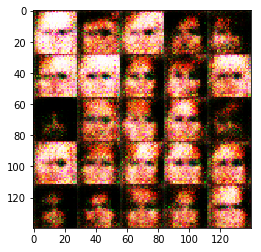

Epoch 1/1... Discriminator Loss: 0.3678... Generator Loss: 3.8594
Epoch 1/1... Discriminator Loss: 0.3596... Generator Loss: 4.1297
Epoch 1/1... Discriminator Loss: 0.3499... Generator Loss: 5.0643
Epoch 1/1... Discriminator Loss: 0.3650... Generator Loss: 3.8615
Epoch 1/1... Discriminator Loss: 0.3631... Generator Loss: 4.3375
Epoch 1/1... Discriminator Loss: 0.3867... Generator Loss: 3.5477
Epoch 1/1... Discriminator Loss: 0.5396... Generator Loss: 6.5132
Epoch 1/1... Discriminator Loss: 0.3690... Generator Loss: 5.1301
Epoch 1/1... Discriminator Loss: 0.3781... Generator Loss: 3.6088
Epoch 1/1... Discriminator Loss: 0.3752... Generator Loss: 4.2426


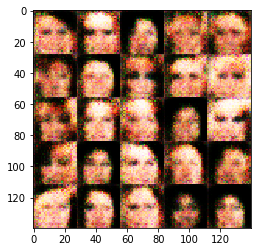

Epoch 1/1... Discriminator Loss: 0.3779... Generator Loss: 4.4818
Epoch 1/1... Discriminator Loss: 0.8088... Generator Loss: 1.4004
Epoch 1/1... Discriminator Loss: 0.4438... Generator Loss: 2.8625
Epoch 1/1... Discriminator Loss: 0.3705... Generator Loss: 3.9780
Epoch 1/1... Discriminator Loss: 0.3753... Generator Loss: 4.2481
Epoch 1/1... Discriminator Loss: 0.3858... Generator Loss: 3.4235
Epoch 1/1... Discriminator Loss: 0.3766... Generator Loss: 4.1021
Epoch 1/1... Discriminator Loss: 0.4888... Generator Loss: 6.3043
Epoch 1/1... Discriminator Loss: 0.3657... Generator Loss: 4.0143
Epoch 1/1... Discriminator Loss: 0.3717... Generator Loss: 5.1713


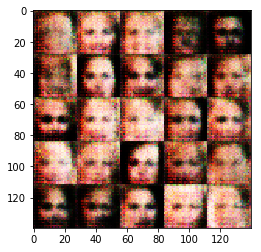

Epoch 1/1... Discriminator Loss: 0.4265... Generator Loss: 2.7324
Epoch 1/1... Discriminator Loss: 0.3619... Generator Loss: 4.1920
Epoch 1/1... Discriminator Loss: 0.3898... Generator Loss: 3.3629
Epoch 1/1... Discriminator Loss: 0.4233... Generator Loss: 2.7849
Epoch 1/1... Discriminator Loss: 0.3844... Generator Loss: 3.8958
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 3.6211
Epoch 1/1... Discriminator Loss: 0.3894... Generator Loss: 4.2102
Epoch 1/1... Discriminator Loss: 0.4664... Generator Loss: 2.9652
Epoch 1/1... Discriminator Loss: 0.4377... Generator Loss: 2.6914
Epoch 1/1... Discriminator Loss: 0.3893... Generator Loss: 4.8346


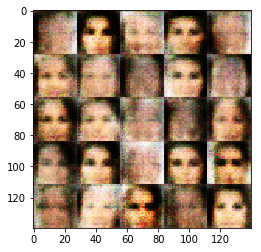

Epoch 1/1... Discriminator Loss: 0.3966... Generator Loss: 4.0795
Epoch 1/1... Discriminator Loss: 0.4924... Generator Loss: 2.2310
Epoch 1/1... Discriminator Loss: 0.4070... Generator Loss: 3.2903
Epoch 1/1... Discriminator Loss: 0.4018... Generator Loss: 3.1768
Epoch 1/1... Discriminator Loss: 0.4041... Generator Loss: 3.2961
Epoch 1/1... Discriminator Loss: 0.5176... Generator Loss: 2.3117
Epoch 1/1... Discriminator Loss: 0.4095... Generator Loss: 3.5754
Epoch 1/1... Discriminator Loss: 0.4234... Generator Loss: 3.1072
Epoch 1/1... Discriminator Loss: 0.3935... Generator Loss: 3.7631
Epoch 1/1... Discriminator Loss: 0.4226... Generator Loss: 3.5557


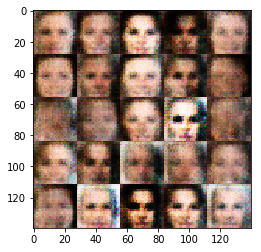

Epoch 1/1... Discriminator Loss: 0.4618... Generator Loss: 2.5262
Epoch 1/1... Discriminator Loss: 0.5168... Generator Loss: 2.1554
Epoch 1/1... Discriminator Loss: 0.6485... Generator Loss: 5.3540
Epoch 1/1... Discriminator Loss: 0.5081... Generator Loss: 2.9518
Epoch 1/1... Discriminator Loss: 0.4694... Generator Loss: 2.6787
Epoch 1/1... Discriminator Loss: 0.7931... Generator Loss: 5.0029
Epoch 1/1... Discriminator Loss: 0.4573... Generator Loss: 3.5608
Epoch 1/1... Discriminator Loss: 0.4766... Generator Loss: 2.4831
Epoch 1/1... Discriminator Loss: 0.4957... Generator Loss: 2.3474
Epoch 1/1... Discriminator Loss: 0.5781... Generator Loss: 1.8617


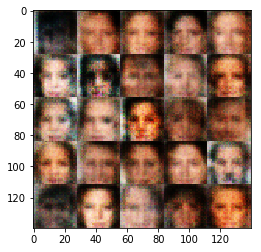

Epoch 1/1... Discriminator Loss: 0.5732... Generator Loss: 3.4665
Epoch 1/1... Discriminator Loss: 0.6223... Generator Loss: 1.5627
Epoch 1/1... Discriminator Loss: 0.5700... Generator Loss: 1.8565
Epoch 1/1... Discriminator Loss: 0.4607... Generator Loss: 2.7706
Epoch 1/1... Discriminator Loss: 0.4393... Generator Loss: 3.1365
Epoch 1/1... Discriminator Loss: 0.4579... Generator Loss: 3.2095
Epoch 1/1... Discriminator Loss: 0.4694... Generator Loss: 3.2735
Epoch 1/1... Discriminator Loss: 0.4751... Generator Loss: 2.4465
Epoch 1/1... Discriminator Loss: 0.4266... Generator Loss: 3.1493
Epoch 1/1... Discriminator Loss: 0.4807... Generator Loss: 2.9377


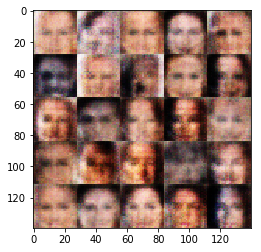

Epoch 1/1... Discriminator Loss: 0.4404... Generator Loss: 3.0836
Epoch 1/1... Discriminator Loss: 0.4326... Generator Loss: 3.8107
Epoch 1/1... Discriminator Loss: 0.4700... Generator Loss: 2.9076
Epoch 1/1... Discriminator Loss: 0.4463... Generator Loss: 3.0034
Epoch 1/1... Discriminator Loss: 0.4666... Generator Loss: 3.1731
Epoch 1/1... Discriminator Loss: 0.4586... Generator Loss: 2.6046
Epoch 1/1... Discriminator Loss: 0.5081... Generator Loss: 2.7678
Epoch 1/1... Discriminator Loss: 1.1452... Generator Loss: 0.9134
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 3.1509
Epoch 1/1... Discriminator Loss: 0.7538... Generator Loss: 1.3353


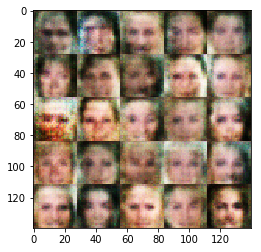

Epoch 1/1... Discriminator Loss: 0.5982... Generator Loss: 1.7575
Epoch 1/1... Discriminator Loss: 0.5130... Generator Loss: 2.2518
Epoch 1/1... Discriminator Loss: 0.4760... Generator Loss: 2.8152
Epoch 1/1... Discriminator Loss: 0.5307... Generator Loss: 2.0359
Epoch 1/1... Discriminator Loss: 0.4506... Generator Loss: 3.8612
Epoch 1/1... Discriminator Loss: 0.5100... Generator Loss: 2.2852
Epoch 1/1... Discriminator Loss: 0.4925... Generator Loss: 2.5910
Epoch 1/1... Discriminator Loss: 0.6003... Generator Loss: 1.7830
Epoch 1/1... Discriminator Loss: 0.4804... Generator Loss: 2.3938
Epoch 1/1... Discriminator Loss: 0.4571... Generator Loss: 2.8668


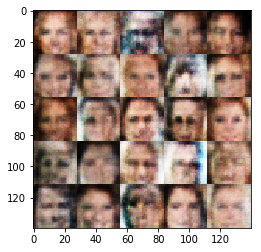

Epoch 1/1... Discriminator Loss: 0.6518... Generator Loss: 4.3326
Epoch 1/1... Discriminator Loss: 0.4865... Generator Loss: 2.5853
Epoch 1/1... Discriminator Loss: 0.4369... Generator Loss: 3.1829
Epoch 1/1... Discriminator Loss: 0.5531... Generator Loss: 1.9339
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 0.4755... Generator Loss: 2.8885
Epoch 1/1... Discriminator Loss: 0.4872... Generator Loss: 2.4539
Epoch 1/1... Discriminator Loss: 0.5473... Generator Loss: 3.9322
Epoch 1/1... Discriminator Loss: 0.5279... Generator Loss: 2.2464
Epoch 1/1... Discriminator Loss: 0.4491... Generator Loss: 2.7735


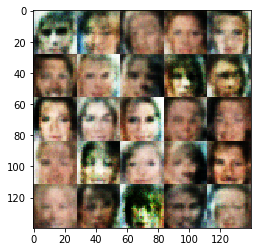

Epoch 1/1... Discriminator Loss: 0.5248... Generator Loss: 2.0614
Epoch 1/1... Discriminator Loss: 0.4794... Generator Loss: 2.4361
Epoch 1/1... Discriminator Loss: 0.5328... Generator Loss: 2.8410
Epoch 1/1... Discriminator Loss: 0.7282... Generator Loss: 1.3919
Epoch 1/1... Discriminator Loss: 0.4808... Generator Loss: 2.4180
Epoch 1/1... Discriminator Loss: 0.4987... Generator Loss: 2.8822
Epoch 1/1... Discriminator Loss: 0.5338... Generator Loss: 2.0022
Epoch 1/1... Discriminator Loss: 0.5476... Generator Loss: 2.1371
Epoch 1/1... Discriminator Loss: 0.4955... Generator Loss: 2.5243
Epoch 1/1... Discriminator Loss: 0.5259... Generator Loss: 2.2552


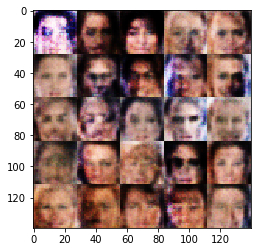

Epoch 1/1... Discriminator Loss: 0.4974... Generator Loss: 2.4760
Epoch 1/1... Discriminator Loss: 0.4733... Generator Loss: 3.3830
Epoch 1/1... Discriminator Loss: 0.5056... Generator Loss: 3.3095
Epoch 1/1... Discriminator Loss: 0.4896... Generator Loss: 2.2858
Epoch 1/1... Discriminator Loss: 0.5096... Generator Loss: 2.7043
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 0.5062... Generator Loss: 2.2606
Epoch 1/1... Discriminator Loss: 0.4923... Generator Loss: 2.3572
Epoch 1/1... Discriminator Loss: 0.6099... Generator Loss: 3.3276
Epoch 1/1... Discriminator Loss: 0.8491... Generator Loss: 1.1563


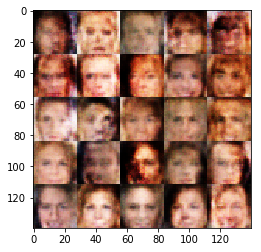

Epoch 1/1... Discriminator Loss: 0.5128... Generator Loss: 2.4401
Epoch 1/1... Discriminator Loss: 0.5609... Generator Loss: 1.9276
Epoch 1/1... Discriminator Loss: 0.4878... Generator Loss: 2.9243
Epoch 1/1... Discriminator Loss: 0.5085... Generator Loss: 2.1376
Epoch 1/1... Discriminator Loss: 0.6119... Generator Loss: 1.6309
Epoch 1/1... Discriminator Loss: 0.6065... Generator Loss: 1.6143
Epoch 1/1... Discriminator Loss: 0.7268... Generator Loss: 1.3708
Epoch 1/1... Discriminator Loss: 0.4862... Generator Loss: 3.2993


In [37]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.